#Content

- Business Case
- EDA

#Business Case

**Amazon** is facing a high surge of returns on some of its Products, which has led to the downgrade of the company credibility.

So they have appointed you as their Data Scientist:
- To estimate whether customer will return the product or not 
- based on the product description, transportation, importance and prices 

With this, lets load the data:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1K4hCspyd-NGFCFHJb6IVgw0JDu3ckzCt

df = pd.read_csv('Amazon.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1K4hCspyd-NGFCFHJb6IVgw0JDu3ckzCt
To: /content/Amazon.csv
100% 436k/436k [00:00<00:00, 97.9MB/s]


**Data Description:**


| Id | Features | Description |
| :-- | :--| :--| 
|01| **ID** | ID of Customers|
|02| **Warehouse_block** | The Company have big Warehouses which is divided in to block such as A,B,C,D,E| 
|03|**Mode_of_Shipment**|The Company Ships the products in multiple way such as Ship, Flight and Road.|
|04|**Customer_care_calls**|The number of calls made from enquiry for enquiry of the shipment|
|05|**Customer_rating**| The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best)|
|06|**Cost_of_the_Product**|Price of the Product|
|07|**Prior_purchases**|The Number of Prior Purchases of the customer|
|08|**Product_importance**|The company has categorized the product in the various parameter such as low, medium, high.|
|09|**Gender**|If Customer is a Male or Female|
|10|**Discount_offered**|Discount offered on that specific product|
|11|**Weight_in_gms**|It is the weight in grams|
|12|**Returned**|It is the target variable, where 1 Indicates that the product is returned|


In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Returned
0,1,D,Flight,4,2,885,3,low,F,44,1233,1
1,2,F,Flight,4,5,1080,2,low,M,59,3088,1
2,3,A,Flight,2,2,915,4,low,M,48,3374,1
3,4,B,Flight,3,3,880,4,medium,M,10,1177,1
4,5,C,Flight,2,2,920,3,medium,F,46,2484,1


Total Number of samples and features of the data:
<center>

| Records | Features | 
| :-- | :-- | 
| 10999 | 12 | 

In [ ]:
df.shape

(10999, 12)

In [ ]:
X = df.drop(columns=['ID','Returned'])
y = df['Returned']

Splitting the data into Train, Validation and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print('Train : ', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test  : ', X_test.shape, y_test.shape)

Train :  (7039, 10) (7039,)
Validation: (1760, 10) (1760,)
Test  :  (2200, 10) (2200,)


#EDA

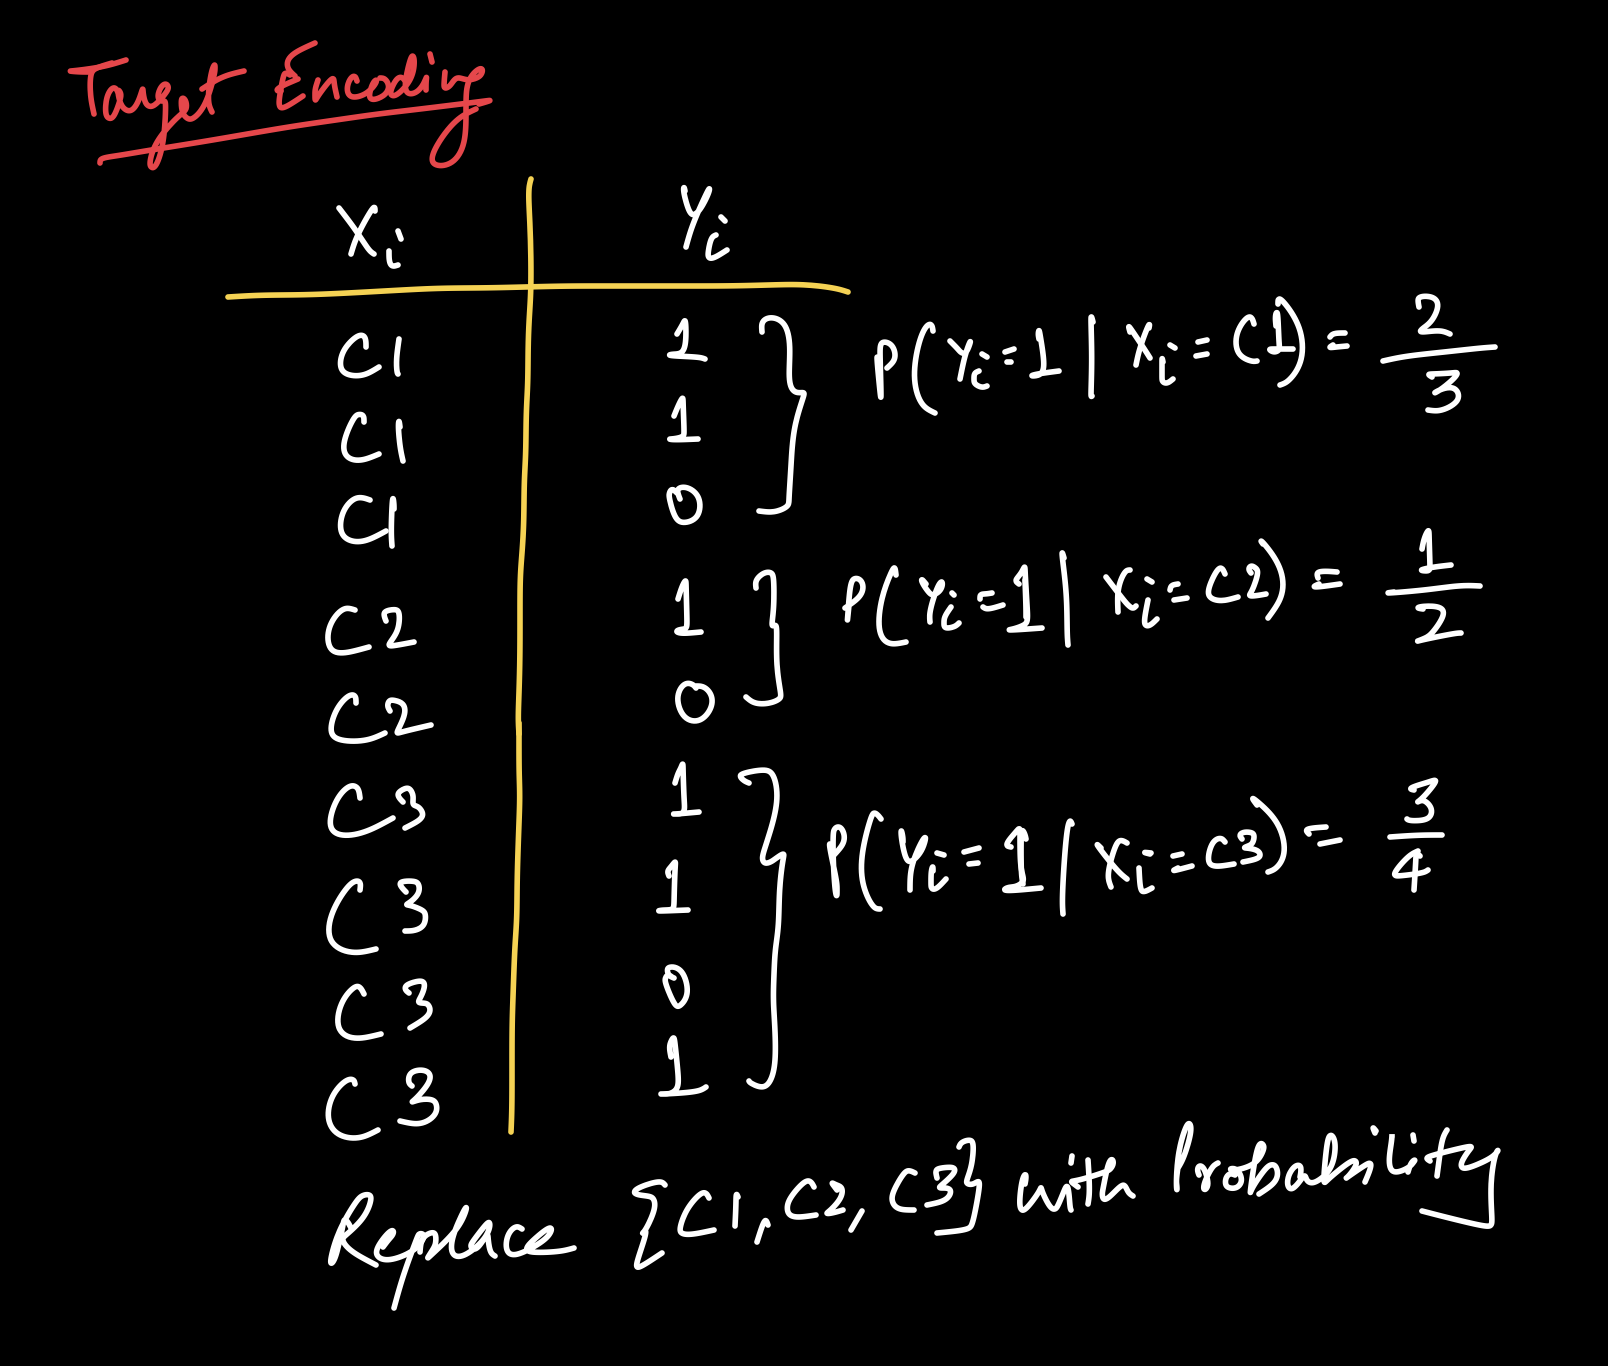

#### Which Encoding to use to transform Categorical features ?

Ans: Since there are many categories in all the Categorical features,
- Which will make the One-Hot Encoding quite large and sparse
- Its better to use Target Encoding



#### How do target encoding ?
Ans: Target Encoding finds the Probability of $y =$(some class$k$) when the Categorical feature $(f) = C_i$ 
- $P(y=k|f=C_i)$
- And replace the all the samples which have feature value as $C_i$ to  $P(y=k|f=C_i)$

```
Suppose y = [0,1] and f = [c1,c2,c3] such that:
- out of 200 samples, 50 samples have y = 1, when f = c1
-  25 samples have y = 1, when f = c2 
-  And, 10 samples have y = 1, when f = c3 
```
#### What is the Target Encoding value for the feature ?

Ans: $P(Y=1 | f= C_1) = \frac{50}{200} = 0.25$
- $P(Y=1 | f= C_2) = \frac{25}{200} = 0.13$
- $P(Y=1 | f= C_3) = \frac{10}{200} = 0.05$

<br>

With this, lets implement Target Encoding


In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder


Converting all the Categorical Features to Numerical 
- using TargetEncoding

In [ ]:
enc = TargetEncoder(cols=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])
X_train = enc.fit_transform(X_train, y_train)

X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

X_train.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
10286,0.578005,0.608167,6,2,980,2,0.600878,0.596148,10,5180
7746,0.600336,0.600251,4,3,1140,5,0.600878,0.599487,9,1044
1789,0.601109,0.608167,5,2,1155,4,0.586928,0.596148,41,2992
2521,0.601109,0.600251,6,4,1105,10,0.586928,0.596148,42,2972
10404,0.600336,0.576471,5,3,1215,6,0.600878,0.599487,1,1856


**Observe**
- How the data is not Standardized

<br>

Lets Standardize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
